<h2>ARC Liver-Spleen Project - Elastography Datasheet Demographic Summary</h2>
Zachary Taylor

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
!pip install matplotlib-venn
import matplotlib_venn
from matplotlib_venn import venn3
import os
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
df1 = pd.read_csv("LS_all_features_batch1.csv")
df2 = pd.read_csv("LS_all_features_batch2.csv")
df = pd.concat(
    map(pd.read_csv, ['LS_all_features_batch1.csv', 'LS_all_features_batch2.csv']), ignore_index=True)

In [3]:
dfsub = df[["Subject ID", "GENDER", "RACE", "ETHNICITY", "Age (DOS)", "WEIGHT", "HEIGHT", "field_strength", "manufacturer"]]
print("Total Patients / Samples: 1204")
#dfsub.describe()

#T2 Categorization

#df3 = pd.read_csv("MaskRegistrationResults1.csv")
#df4 = pd.read_csv("MaskRegistrationResults2.csv")
#df5 = pd.read_csv("MaskRegistrationResults_T1.csv")

dft2 = pd.concat(map(pd.read_csv,['MaskRegistrationResults1.csv', 'MaskRegistrationResults2.csv']), ignore_index=True)
dft2.drop_duplicates()
#missingdirs = dft2["mask directory"].isnull().sum().sum()
dft2['mask directory'] = dft2['mask directory'].fillna("missing")
#missingseqs = dfsubnew["sequence"].isnull().sum().sum()
dft2['sequence'] = dft2['sequence'].fillna("missing")


dft2sub = dft2[["Subject ID","T2 Directory", "mask directory", "sequence", "has directory"]]


dfsubnew = dfsub.merge(dft2sub, how='outer', on='Subject ID')
dfsubnew['sequence'] = dfsubnew['sequence'].fillna("unknown")

print(dfsubnew.describe())
#print(dft2sub.describe())
#print(pd.concat(([dfsubnew['Age (DOS)'].count - 1204,dfsubnew['WEIGHT'].count - 1204],dfsubnew['HEIGHT'].count - 1204,dfsubnew['field_strength'].count - 1204, dfsubnew['has_directory'].count - 1204), axis=1,keys=['counts', '%']))
print("missing weight: ",(1204-dfsubnew['WEIGHT'].count()))
print("missing height: ",(1204-dfsubnew['HEIGHT'].count()))
print("missing field strength: ",(1204-dfsubnew['field_strength'].count()))
print("missing directory info: ",(1204-dfsubnew['has directory'].count()))

Total Patients / Samples: 1204
         Age (DOS)       WEIGHT       HEIGHT  field_strength  has directory
count  1204.000000  1111.000000  1102.000000     1204.000000    1050.000000
mean     16.648671  2874.128668    62.298264        1.676910       0.922857
std       9.288146  1305.876406     8.551666        0.484007       0.266945
min       0.000000    84.660000    16.772000        1.500000       0.000000
25%      11.000000  1941.815000    58.661000        1.500000       1.000000
50%      15.000000  2857.160000    64.193000        1.500000       1.000000
75%      18.000000  3779.565000    67.913000        1.500000       1.000000
max      67.000000  7360.000000    79.000000        3.000000       1.000000
missing weight:  93
missing height:  102
missing field strength:  0
missing directory info:  154


<h3>Categorical Analysis</h3>

In [4]:
subjectcount = dfsubnew["Subject ID"].value_counts()

dft2['mask directory'] = dft2['mask directory'].fillna("missing")

dfsubnew["has directory"] = dfsubnew["has directory"].fillna("unknown")
dircount_dict = {1.0:"Found", 0.0:"Not Found", "unknown":"Unknown"}
dircount = dfsubnew["has directory"].value_counts().rename(index=dircount_dict)
percdir = dircount / dircount.sum()



print("\nMask Directory Count:")
#print("\nmissing directories:",missingdirs)

#t2 = dft2sub["Subject ID"].count() - missingperc
#found = {"T2":[t2],"Missing Directory":[missingdirs]}
#dft2found = pd.DataFrame(data=found)
print(pd.concat([dircount,percdir], axis=1,keys=['counts', '%']))


print("\nSequence Count:")
#seq_dict = {'T2_Axials':['Axial T2', 'Ax T2'], 'T1_axials':['Axial T1', 'Ax T1'], 'T2_Coronal':['T2 Cor'] }
#print("missing sequences:",missingseqs)

sequencecount = dfsubnew["sequence"].value_counts(dropna=False)
sequenceperc = dfsubnew["sequence"].value_counts(dropna=False, normalize=True)

t2_ax = t1_ax = t2_cor = t1_cor = ax = cor = otherseq = miss = unknownseq = 0
labelarr=sequencecount.index

i=0
while i<sequencecount.size:
    if(not isinstance(labelarr[i], str)):
        unknownseq = unknownseq + sequencecount[i]
    elif((labelarr[i].find("Axial T2")!= -1) or (labelarr[i].find("Ax T2")!= -1)):
        t2_ax = t2_ax + sequencecount[i]
    elif((labelarr[i].find("Axial T1")!= -1) or (labelarr[i].find("Ax T1")!= -1)):
        t1_ax = t1_ax + sequencecount[i]
    elif((labelarr[i].find("T2 Cor")!= -1) or (labelarr[i].find("T2 COR")!= -1) or (labelarr[i].find("COR T2")!= -1) or (labelarr[i].find("T2 COR")!= -1)):
        t2_cor = t2_cor + sequencecount[i]
    elif((labelarr[i].find("T1 Cor")!= -1) or (labelarr[i].find("T1 COR")!= -1) or (labelarr[i].find("COR T1")!= -1) or (labelarr[i].find("T1 COR")!= -1)):
        t1_cor = t1_cor + sequencecount[i]
    elif((labelarr[i].find("AX")!= -1) or (labelarr[i].find("Ax")!= -1)):
        ax = ax + sequencecount[i]
    elif((labelarr[i].find("COR")!= -1) or (labelarr[i].find("Cor")!= -1)):
        cor = cor + sequencecount[i]
    elif((labelarr[i]=="missing")):
        miss = miss + sequencecount[i]
    elif((labelarr[i]=="unknown")):
        unknownseq = unknownseq + sequencecount[i]
    else:
        otherseq = otherseq + sequencecount[i]
    i = i + 1
        
filteredseq = {'T2 Axial':t2_ax, 'T1 Axial':t1_ax, 'T2 Coronal':t2_cor, 'T1 Coronal':t1_cor, 'Other Axial':ax, 'Other Coronal':cor, 'Other':otherseq, 'Missing':miss, 'Unknown':unknownseq}

arrseq = np.array([t2_ax, t1_ax, t2_cor, t1_cor, ax, cor, otherseq, miss, unknownseq])
arrseqlabels = ['T2 Axial', 'T1 Axial', 'T2 Coronal', 'T1 Coronal', 'Other Axial', 'Other Coronal', 'Other', 'Missing', 'Unknown']
totalseq = arrseq.sum()
percseq = arrseq/totalseq

print('TOTAL:',totalseq)
#print(pd.concat([sequencecount,sequenceperc], axis=1,keys=['counts', '%']))
print(pd.concat([pd.DataFrame(arrseqlabels),pd.DataFrame(arrseq),pd.DataFrame(percseq)], axis=1,keys=['Sequence','counts', '%']))



Mask Directory Count:
           counts         %
Found         969  0.804817
Unknown       154  0.127907
Not Found      81  0.067276

Sequence Count:
TOTAL: 1204
        Sequence counts         %
               0      0         0
0       T2 Axial    670  0.556478
1       T1 Axial      4  0.003322
2     T2 Coronal      2  0.001661
3     T1 Coronal     89  0.073920
4    Other Axial    149  0.123754
5  Other Coronal     48  0.039867
6          Other      7  0.005814
7        Missing     81  0.067276
8        Unknown    154  0.127907


In [5]:
print('Race:')
racecount = dfsub["RACE"].value_counts(dropna=False)
raceperc = dfsub["RACE"].value_counts(dropna=False, normalize=True)
print(pd.concat([racecount,raceperc], axis=1,keys=['counts', '%']))

labelarr = racecount.index
justwhite = justblack = whiteblack = blackother = whiteother = whiteblackother = other = 0
i = 0
while i<racecount.size:
    if(not isinstance(labelarr[i], str)):
        other = other + racecount[i]
    elif((labelarr[i])=="WHITE"):
        justwhite = justwhite + racecount[i]
    elif((labelarr[i])=="WHITE,BLACK OR AFRICAN AMERICAN"):
        whiteblack = whiteblack + racecount[i]
    elif((labelarr[i]).find("WHITE") != -1 and (labelarr[i]).find("BLACK") != -1):
        whiteblackother = whiteblackother + racecount[i]
    elif(labelarr[i].find("WHITE") != -1):
        whiteother = whiteother + racecount[i]
    elif(labelarr[i]=="BLACK OR AFRICAN AMERICAN"):
        justblack = justblack + racecount[i]
    elif(labelarr[i].find("BLACK") != -1):
        blackother = blackother + racecount[i]
    else:
        other = other + racecount[i]
    i = i + 1

print('\nSimplified Counts for Figures')
print('White:',justwhite)
print('Black / African American:',justblack)
print('Other:',other)
print('Black / African American and White:',whiteblack)
print('Black and Other',blackother)
print('White and Other',whiteother)
print('Black / African American, White, and Other:',whiteblackother)

print('\nEthnicity:')
ethcount = dfsub["ETHNICITY"].value_counts(dropna=False)
ethperc = dfsub["ETHNICITY"].value_counts(dropna=False, normalize=True)
print(pd.concat([ethcount,ethperc], axis=1,keys=['counts', '%']))
nonhisp = ethcount.take([0])
print('\nSimplified Counts for Figures')
print('Non-Hispanic:',nonhisp.values)
hisp = ethcount.take([1])
print('Hispanic:',hisp.values)
otherhisp = pd.Series({"Other":(ethcount.drop(labels=["Hispanic","Non-Hispanic"]).array.sum())})
print('Other:',otherhisp.values)
dfeth = hisp.append(nonhisp.append(otherhisp))

print('\nGender:')
gendercount = dfsub["GENDER"].value_counts(dropna=False)
genderperc = dfsub["GENDER"].value_counts(dropna=False, normalize=True)
print(pd.concat([gendercount,genderperc], axis=1,keys=['counts', '%']))

print('\nField Strength:')
fieldcount = dfsub["field_strength"].value_counts(dropna=False)
fieldperc = dfsub["field_strength"].value_counts(dropna=False, normalize=True)
print(pd.concat([fieldcount,fieldperc], axis=1,keys=['counts', '%']))

print('\nManufacturer:')
manucount = dfsub["manufacturer"].value_counts(dropna=False)
manuperc = dfsub["manufacturer"].value_counts(dropna=False, normalize=True)
print(pd.concat([manucount,manuperc], axis=1,keys=['counts', '%']))

Race:
                                                    counts         %
WHITE                                                 1004  0.833887
BLACK OR AFRICAN AMERICAN                               69  0.057309
OTHER                                                   44  0.036545
UNKNOWN                                                 28  0.023256
WHITE,BLACK OR AFRICAN AMERICAN                         18  0.014950
HISPANIC/LATINO                                         13  0.010797
NaN                                                      8  0.006645
ASIAN                                                    8  0.006645
WHITE,UNKNOWN                                            3  0.002492
WHITE,NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER         2  0.001661
WHITE,OTHER                                              2  0.001661
WHITE,ASIAN                                              1  0.000831
WHITE,BLACK OR AFRICAN AMERICAN,AMERICAN INDIAN...       1  0.000831
BLACK OR AFRICAN AMERICAN,PA

<h3>Discrete Analysis<h3>

In [6]:
print('Age:\n')
print(dfsub.agg({"Age (DOS)":["min","max","mean","median","skew"]}))

print('\nHeight and Weight:\n')
heightdata = dfsub["HEIGHT"]
weightdata = dfsub["WEIGHT"]
nullheight = heightdata.isnull().sum().sum()
nullweight = weightdata.isnull().sum().sum()
hnullperc = nullheight / heightdata.size * 100
wnullperc = nullweight / weightdata.size * 100
print(dfsub.agg({"HEIGHT":["min","max","mean","median","skew"], "WEIGHT":["min","max","mean","median","skew"]}))
print("NOTE:",nullheight," patients' height not listed; ",nullweight," patients' weight not listed\n",hnullperc,"% patients missing height data\n",wnullperc,"% patients missing weight data")

Age:

        Age (DOS)
min      0.000000
max     67.000000
mean    16.648671
median  15.000000
skew     2.080338

Height and Weight:

           HEIGHT       WEIGHT
min     16.772000    84.660000
max     79.000000  7360.000000
mean    62.298264  2874.128668
median  64.193000  2857.160000
skew    -1.510181     0.158325
NOTE: 102  patients' height not listed;  93  patients' weight not listed
 8.471760797342192 % patients missing height data
 7.724252491694353 % patients missing weight data


<h3>Figures and Graphs<h3>

T2 / Masking:


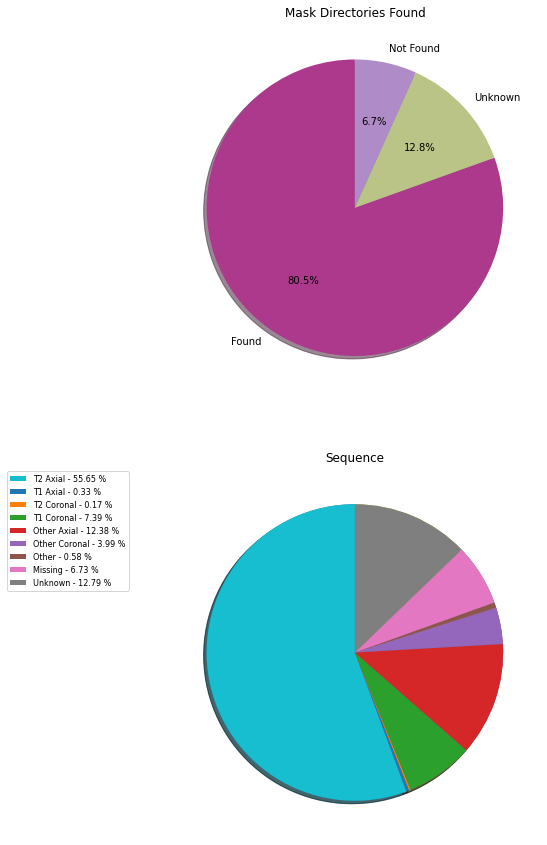

Categorical:


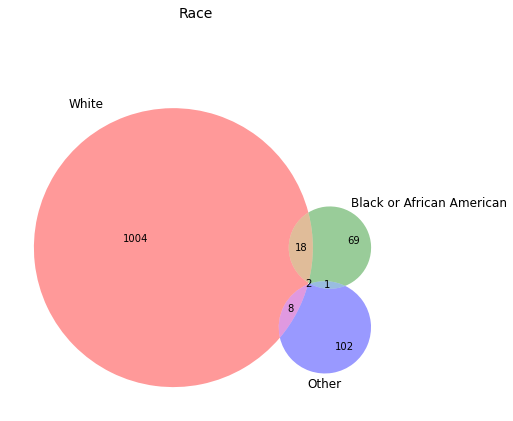

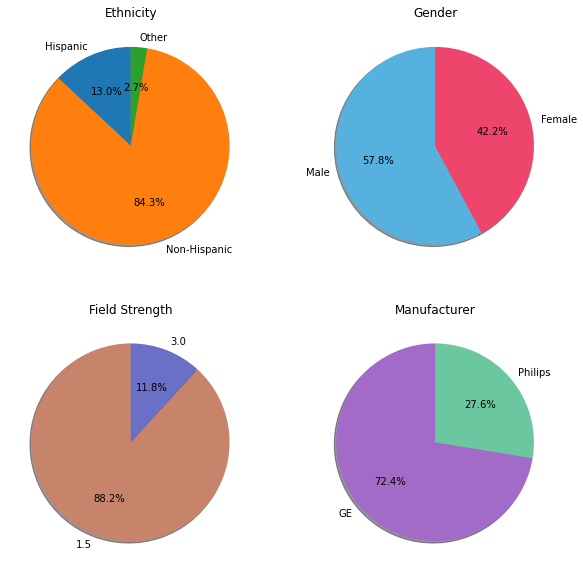



Discrete:



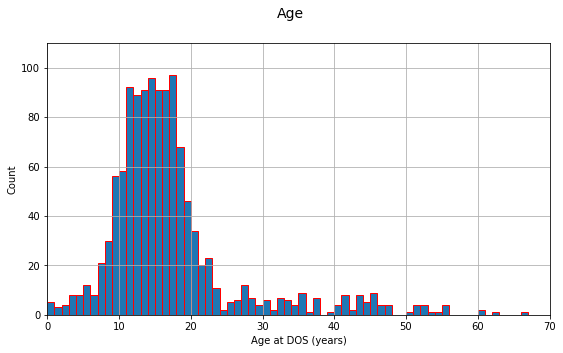

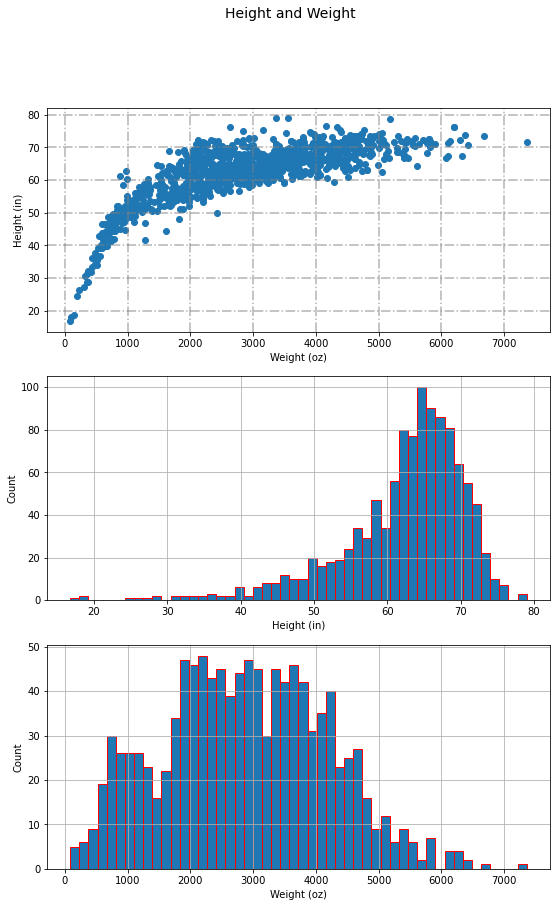

NOTE: 102  patients' height not listed;  93  patients' weight not listed
 8.471760797342192 % patients missing height data
 7.724252491694353 % patients missing weight data


In [7]:
print('T2 / Masking:')

figt, axt = plt.subplots(2, figsize = (12,15))
colorsmd = ['#ad398c','#bbc487','#af8bc7']
axt[0].pie(dircount, labels=dircount.index,colors=colorsmd,autopct='%1.1f%%',
        shadow=True, startangle=90)
axt[0].set_title('Mask Directories Found')
axt[1].pie(arrseq,
        shadow=True, startangle=90)
patches, texts = axt[1].pie(arrseq,
        shadow=True, startangle=90)
seqlabels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(arrseqlabels, percseq * 100)]
axt[1].legend(patches, seqlabels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
axt[1].set_title('Sequence')
plt.show()


print('Categorical:')

#plt.figure(0)
plt.figure(figsize=(7,7))

venn3(subsets = (justwhite,justblack,whiteblack,other,whiteother,blackother,whiteblackother),set_labels=("White", "Black or African American", "Other"))
plt.suptitle('Race', fontsize=14)
plt.show()

fig2, axes = plt.subplots(2,2, figsize = (10,10))
colors1 = ['#57b1de','#ed456c']
colors2 = ['#c7846b','#6b70c7']
colors3 = ['#a26bc7','#6bc79f']

axes[0,0].pie(dfeth, labels=dfeth.index,autopct='%1.1f%%',
        shadow=True, startangle=90)
axes[0,0].set_title('Ethnicity')
axes[0,1].pie(gendercount, labels=gendercount.index,colors=colors1,autopct='%1.1f%%',
        shadow=True, startangle=90)
axes[0,1].set_title("Gender")
axes[1,0].pie(fieldcount, labels=fieldcount.index,colors=colors2,autopct='%1.1f%%',
        shadow=True, startangle=90)
axes[1,0].set_title("Field Strength")
axes[1,1].pie(manucount, labels=manucount.index,colors=colors3,autopct='%1.1f%%',
        shadow=True, startangle=90)
axes[1,1].set_title("Manufacturer")

plt.show()
print('\n\nDiscrete:\n')

agedata = dfsub["Age (DOS)"]

binwidth = 1
plt.figure(figsize=(9,5))
plt.suptitle('Age', fontsize=14)
plt.hist(dfsub["Age (DOS)"], bins=range(min(agedata), max(agedata) + binwidth, binwidth), edgecolor="red")
plt.xlabel('Age at DOS (years)')
plt.ylabel('Count')
plt.axis([0, 70, 0, 110])
plt.grid()
plt.show()
print('\n\n')


binwidth = 1
fig, ax = plt.subplots(3, figsize=(9, 14))
plt.suptitle('Height and Weight', fontsize=14)
ax[0].scatter(weightdata, heightdata)
ax[0].set_xlabel("Weight (oz)")
ax[0].set_ylabel("Height (in)")
ax[0].grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dashdot', lw=1.5)

ax[1].hist(heightdata.astype('float'), bins=50, edgecolor="red")
ax[1].set_xlabel('Height (in)')
ax[1].set_ylabel('Count')
ax[1].grid()

ax[2].hist(weightdata.astype('float'), bins=50, edgecolor="red")
ax[2].set_xlabel('Weight (oz)')
ax[2].set_ylabel('Count')
ax[2].grid()

plt.show()

nullheight = heightdata.isnull().sum().sum()
nullweight = weightdata.isnull().sum().sum()
hnullperc = nullheight / heightdata.size * 100
wnullperc = nullweight / weightdata.size * 100
print("NOTE:",nullheight," patients' height not listed; ",nullweight," patients' weight not listed\n",hnullperc,"% patients missing height data\n",wnullperc,"% patients missing weight data")